# Visualize ECG Data with Participant Trends
This notebook processes ECG data to visualize average heart rate across different conditions and connects individual participant data points with distinguishable lines.

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
Load the `.csv` file containing the summary of ECG results.

In [2]:
# Import pandas
import pandas as pd

# Paths to folders
results_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/results/'

# Load the .csv file
filename = results_folder + 'ecg_results.csv'
results = pd.read_csv(filename)

# Flatten the nested structures (if necessary)
# Example: Remove nested brackets or reshape nested values
results = results.applymap(lambda x: x.strip('[]') if isinstance(x, str) else x)

# Convert to numeric values, if needed
results = results.apply(pd.to_numeric, errors='ignore')

# Display the flattened data
print(results.head())


   ECG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1 HRV_SDANN2  \
0      63.527690  944.731183  32.015922   14.688297   29.104305        nan   
1      62.102044  966.505263  48.222560   22.305881   41.994629        nan   
2      62.968659  954.224880  89.329889   33.536239   47.212290        nan   
3      75.492160  794.614719  44.241959    6.441768   42.891501        nan   
4      73.902793  812.004425  55.364369   49.730561   36.821707        nan   

  HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5   HRV_RMSSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0        nan        nan        nan   26.804397  ...     1.315105  1.494861   
1        nan        nan        nan   35.869767  ...     1.141995  1.429058   
2        nan        nan        nan  114.955322  ...     0.801375  1.209930   
3        nan        nan        nan   26.612109  ...     0.964235  1.438150   
4        nan        nan        nan   20.432980  ...     0.736528  1.315022   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_L

/var/folders/9y/0lwymqlj4yn3rrjc_2kq6sgr0000gn/T/ipykernel_16187/1000681883.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results = results.applymap(lambda x: x.strip('[]') if isinstance(x, str) else x)
/var/folders/9y/0lwymqlj4yn3rrjc_2kq6sgr0000gn/T/ipykernel_16187/1000681883.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  results = results.apply(pd.to_numeric, errors='ignore')


## Filter Data by Condition
Separate the data into `baseline`, `spiderhand`, and `spidervideo` conditions.

In [8]:
# Filter rows for each condition
baseline = results[results['Condition'] == 'baseline']
spiderhand = results[results['Condition'] == 'spiderhand']
spidervideo = results[results['Condition'] == 'spidervideo']

# Calculate mean values for ECG_Rate_Mean for each condition
conditions = ['Baseline', 'Spiderhand', 'Spidervideo']
ecg_averages = [
    baseline['ECG_Rate_Mean'].mean(), 
    spiderhand['ECG_Rate_Mean'].mean(), 
    spidervideo['ECG_Rate_Mean'].mean()
]

# Calculate mean values for HRV_MeanNN for each condition
hrv_averages = [
    baseline['HRV_MeanNN'].mean(), 
    spiderhand['HRV_MeanNN'].mean(), 
    spidervideo['HRV_MeanNN'].mean()
]

# Display the results
print("ECG_Rate_Mean Averages (Heart Rate):", ecg_averages)
print("HRV_MeanNN Averages (Heart Rate Variability):", hrv_averages)


ECG_Rate_Mean Averages (Heart Rate): [np.float64(71.69273545062038), np.float64(68.91967193740551), np.float64(69.3530170714247)]
HRV_MeanNN Averages (Heart Rate Variability): [np.float64(842.7848283666666), np.float64(875.6086556700001), np.float64(873.2541587966666)]


## Define Plot Colors and Styles
Set up color schemes, line styles, and marker styles for visualization.

In [4]:
# Define colors and styles
bar_colors = ['#fde725', '#21918c', '#31688e']
line_styles = ['-', '--', ':']  # Solid, dashed, dotted
marker_styles = ['o', 's', '^']  # Circle, square, triangle

## Create Plot
Visualize the data using a bar chart with scatter plots and connect individual participant data points with distinct lines.

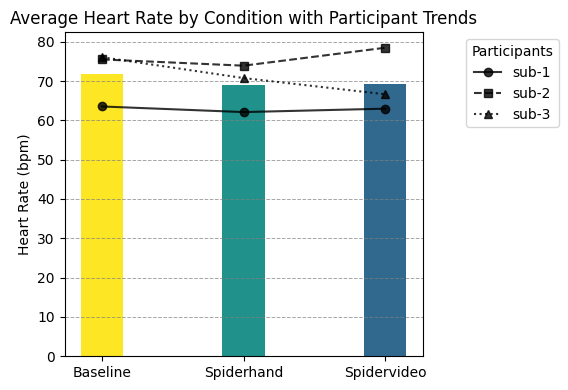

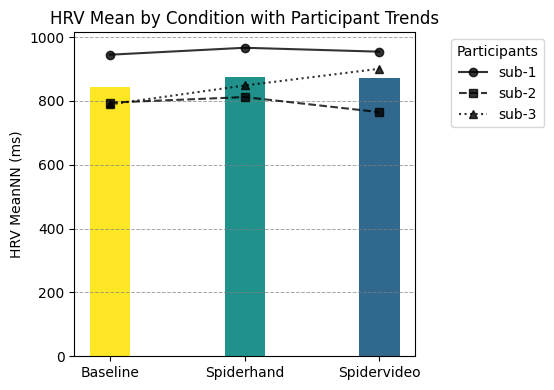

In [17]:
import matplotlib.pyplot as plt

# --- First Plot: Heart Rate (bpm) ---
fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot for Heart Rate
ax.bar(conditions, ecg_averages, color=bar_colors, width=0.3)

# Plot participant data for Heart Rate
participants = results['Participant'].unique()

for i, participant in enumerate(participants):
    # Filter participant data
    participant_data = results[results['Participant'] == participant]
    participant_bpm = [
        participant_data[participant_data['Condition'] == 'baseline']['ECG_Rate_Mean'].values[0],
        participant_data[participant_data['Condition'] == 'spiderhand']['ECG_Rate_Mean'].values[0],
        participant_data[participant_data['Condition'] == 'spidervideo']['ECG_Rate_Mean'].values[0]
    ]
    
    # Plot lines and markers for participant
    ax.plot(
        conditions,
        participant_bpm,
        marker=marker_styles[i % len(marker_styles)], 
        linestyle=line_styles[i % len(line_styles)], 
        color='black', 
        label=participant,
        alpha=0.8,
        linewidth=1.5
    )

# Add labels, title, and legend
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Average Heart Rate by Condition with Participant Trends')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title='Participants')

# Add grid lines
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Save the plot as a PNG
figure_filename = results_folder + 'heart_rate_summary.png'
plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.savefig(figure_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


# --- Second Plot: HRV MeanNN ---
fig, ax2 = plt.subplots(figsize=(6, 4))

# Bar plot for HRV_MeanNN
ax2.bar(conditions, hrv_averages, color=bar_colors, width=0.3)

# Plot participant data for HRV_MeanNN
for i, participant in enumerate(participants):
    # Filter participant data
    participant_data = results[results['Participant'] == participant]
    participant_hrv = [
        participant_data[participant_data['Condition'] == 'baseline']['HRV_MeanNN'].values[0],
        participant_data[participant_data['Condition'] == 'spiderhand']['HRV_MeanNN'].values[0],
        participant_data[participant_data['Condition'] == 'spidervideo']['HRV_MeanNN'].values[0]
    ]
    
    # Plot lines and markers for participant
    ax2.plot(
        conditions,
        participant_hrv,
        marker=marker_styles[i % len(marker_styles)], 
        linestyle=line_styles[i % len(line_styles)], 
        color='black', 
        label=participant,
        alpha=0.8,
        linewidth=1.5
    )

# Add labels, title, and legend
ax2.set_ylabel('HRV MeanNN (ms)')
ax2.set_title('HRV Mean by Condition with Participant Trends')
ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title='Participants')

# Add grid lines
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Save the plot as a PNG
figure_filename2 = results_folder + 'hrv_mean_summary.png'
plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.savefig(figure_filename2, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()


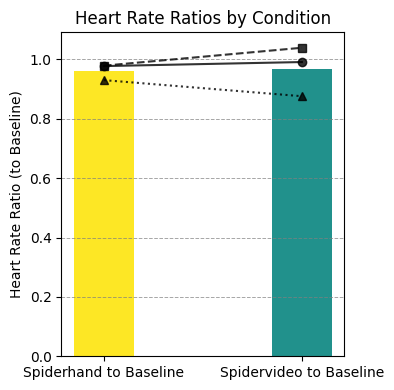

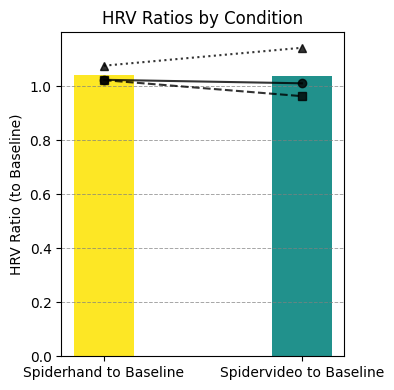

In [24]:
# --- Calculate Ratios for Heart Rate ---
ratios_hr = {
    'Spiderhand to Baseline': spiderhand['ECG_Rate_Mean'].mean() / baseline['ECG_Rate_Mean'].mean(),
    'Spidervideo to Baseline': spidervideo['ECG_Rate_Mean'].mean() / baseline['ECG_Rate_Mean'].mean()
}

# --- Calculate Ratios for HRV ---
ratios_hrv = {
    'Spiderhand to Baseline': spiderhand['HRV_MeanNN'].mean() / baseline['HRV_MeanNN'].mean(),
    'Spidervideo to Baseline': spidervideo['HRV_MeanNN'].mean() / baseline['HRV_MeanNN'].mean()
}

# --- Participant-Specific Ratios ---
participant_ratios_hr = []
participant_ratios_hrv = []

participants = results['Participant'].unique()

for participant in participants:
    participant_data = results[results['Participant'] == participant]
    
    # Heart Rate Ratios
    baseline_hr = participant_data[participant_data['Condition'] == 'baseline']['ECG_Rate_Mean'].values[0]
    spiderhand_hr = participant_data[participant_data['Condition'] == 'spiderhand']['ECG_Rate_Mean'].values[0]
    spidervideo_hr = participant_data[participant_data['Condition'] == 'spidervideo']['ECG_Rate_Mean'].values[0]
    participant_ratios_hr.append([
        spiderhand_hr / baseline_hr,
        spidervideo_hr / baseline_hr
    ])
    
    # HRV Ratios
    baseline_hrv = participant_data[participant_data['Condition'] == 'baseline']['HRV_MeanNN'].values[0]
    spiderhand_hrv = participant_data[participant_data['Condition'] == 'spiderhand']['HRV_MeanNN'].values[0]
    spidervideo_hrv = participant_data[participant_data['Condition'] == 'spidervideo']['HRV_MeanNN'].values[0]
    participant_ratios_hrv.append([
        spiderhand_hrv / baseline_hrv,
        spidervideo_hrv / baseline_hrv
    ])

# --- Plot 1: Heart Rate Ratios ---
fig, ax1 = plt.subplots(figsize=(4, 4))
ratio_conditions = list(ratios_hr.keys())

# Bar plot
ax1.bar(ratio_conditions, ratios_hr.values(), color=bar_colors, width=0.3)

# Plot participant data
for i, participant_ratio in enumerate(participant_ratios_hr):
    ax1.plot(
        ratio_conditions,
        participant_ratio,
        marker=marker_styles[i % len(marker_styles)],
        linestyle=line_styles[i % len(line_styles)],
        color='black',
        alpha=0.8,
        linewidth=1.5
    )

# Add labels, title, and legend
ax1.set_ylabel('Heart Rate Ratio (to Baseline)')
ax1.set_title('Heart Rate Ratios by Condition')
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)


# Save the plot
plt.tight_layout()
plt.savefig(results_folder + 'heart_rate_ratios.png', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()

# --- Plot 2: HRV Ratios ---
fig, ax2 = plt.subplots(figsize=(4, 4))

# Bar plot
ax2.bar(ratio_conditions, ratios_hrv.values(), color=bar_colors, width=0.3)

# Plot participant data
for i, participant_ratio in enumerate(participant_ratios_hrv):
    ax2.plot(
        ratio_conditions,
        participant_ratio,
        marker=marker_styles[i % len(marker_styles)],
        linestyle=line_styles[i % len(line_styles)],
        color='black',
        alpha=0.8,
        linewidth=1.5
    )

# Add labels, title, and legend
ax2.set_ylabel('HRV Ratio (to Baseline)')
ax2.set_title('HRV Ratios by Condition')
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Save the plot
plt.tight_layout()
plt.savefig(results_folder + 'hrv_ratios.png', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [22]:
correlation = results['ECG_Rate_Mean'].corr(results['HRV_MeanNN'])
print(f"Correlation between HR and HRV: {correlation}")

Correlation between HR and HRV: -0.9985785620701718


In [27]:
# --- Calculate Correlation for Each Participant (Across All Conditions) ---
participant_correlations = {}

for participant in participants:
    # Get the participant's data
    participant_data = results[results['Participant'] == participant]
    
    # Extract HR and HRV values for all three conditions
    baseline_hr = participant_data[participant_data['Condition'] == 'baseline']['ECG_Rate_Mean'].values[0]
    spiderhand_hr = participant_data[participant_data['Condition'] == 'spiderhand']['ECG_Rate_Mean'].values[0]
    spidervideo_hr = participant_data[participant_data['Condition'] == 'spidervideo']['ECG_Rate_Mean'].values[0]
    
    baseline_hrv = participant_data[participant_data['Condition'] == 'baseline']['HRV_MeanNN'].values[0]
    spiderhand_hrv = participant_data[participant_data['Condition'] == 'spiderhand']['HRV_MeanNN'].values[0]
    spidervideo_hrv = participant_data[participant_data['Condition'] == 'spidervideo']['HRV_MeanNN'].values[0]
    
    # Create lists of HR and HRV values for the three conditions
    hr_values = [baseline_hr, spiderhand_hr, spidervideo_hr]
    hrv_values = [baseline_hrv, spiderhand_hrv, spidervideo_hrv]
    
    # Calculate the correlation between HR and HRV for this participant
    correlation = np.corrcoef(hr_values, hrv_values)[0, 1]
    
    # Store the correlation for this participant
    participant_correlations[participant] = correlation

# Display correlation results for each participant
for participant, correlation in participant_correlations.items():
    print(f"Participant {participant} - Correlation: {correlation:.4f}")


Participant sub-1 - Correlation: -0.9987
Participant sub-2 - Correlation: -0.9998
Participant sub-3 - Correlation: -0.9993
